Dataset : House price prediction Delhi -- MagicBricks
Taken from Kaggle.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##display all the columns 
pd.pandas.set_option('display.max_columns',None)

In [2]:
# to read the dataset
df=pd.read_csv('D:/dataset/eda/house.csv')

##to print all the rows and columns of the dataset
print(df.shape) 

(1214, 13)


In [3]:
##to print the first five observations of the dataset
df.head()

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",1.0,Ready_to_move,Resale,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000


In [4]:
df.describe()

,Area,BHK,Bathroom,Parking,Per_Sqft,Price
count,1214.000000,1214.000000,1212.000000,1182.000000,973.000000,1.214000e+03
mean,1451.850751,2.778418,2.523927,1.708122,15574.885920,2.079898e+07
std,1586.472855,0.946811,1.017723,5.717177,21574.389007,2.561308e+07
min,28.000000,1.000000,1.000000,1.000000,1259.000000,1.000000e+06
25%,800.000000,2.000000,2.000000,1.000000,6154.000000,5.600000e+06
50%,1150.000000,3.000000,2.000000,1.000000,10838.000000,1.400000e+07
75%,1620.000000,3.000000,3.000000,2.000000,17647.000000,2.500000e+07
max,24300.000000,10.000000,7.000000,114.000000,183333.000000,2.400000e+08


# Data Engineering

In [5]:
#To find there is any null values or not

df.isnull().values.any()

True

In [6]:
# To find all the null values in every feature

df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       0
Location         0
District         0
Locality         0
Parking         32
Status           0
Transaction      0
Type             5
Per_Sqft       241
Price            0
dtype: int64

In [7]:
##To know the date type,and whether they contain null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1214 non-null   float64
 1   BHK          1214 non-null   int64  
 2   Bathroom     1212 non-null   float64
 3   Furnishing   1214 non-null   object 
 4   Location     1214 non-null   object 
 5   District     1214 non-null   object 
 6   Locality     1214 non-null   object 
 7   Parking      1182 non-null   float64
 8   Status       1214 non-null   object 
 9   Transaction  1214 non-null   object 
 10  Type         1209 non-null   object 
 11  Per_Sqft     973 non-null    float64
 12  Price        1214 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 123.4+ KB


In [8]:
[features for features in df.columns if df[features].isnull().sum()>1]

['Bathroom', 'Parking', 'Type', 'Per_Sqft']

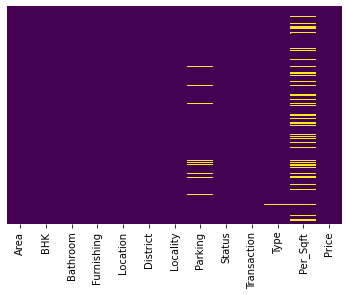

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
##to check the percentage of nan values in features
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

##if any feature have atleast one nan values we are going to consider that value

##to display the feature with its percentage of missing values
##Here we are iterating the values of nan values 

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

##Here we are printing the name of features with the percentage and rounding off the mean value till the four decimal

Bathroom 0.0016 % missing values
Parking 0.0264 % missing values
Type 0.0041 % missing values
Per_Sqft 0.1985 % missing values


In [11]:
features_with_na

['Bathroom', 'Parking', 'Type', 'Per_Sqft']

Bathroom


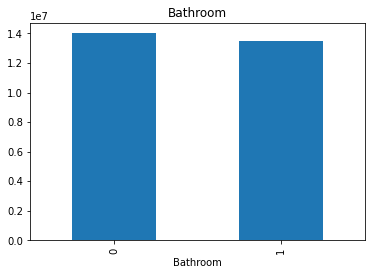

Parking


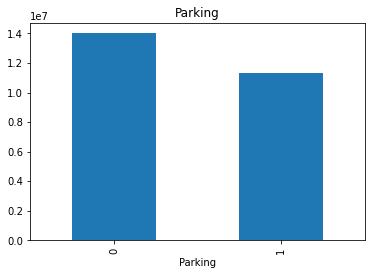

Type


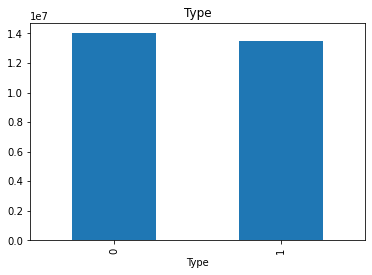

Per_Sqft


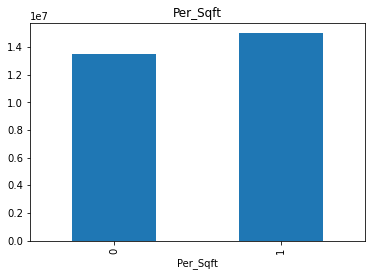

In [12]:
#Making a copy of dataset by iterating through each features
for feature in features_with_na:
    print(feature)
    data = df.copy()
    
    #indicating missing variable as 1 and else zero
    data[feature] = np.where(data[feature].isnull(), 1, 0)     
    
    ##calculating the mean of price where information is missing and also plotting it with count plot
    data.groupby(feature)['Price'].median().plot.bar()
    
    ##to give the title of the countplot same as feature name
    plt.title(feature)
    
    ##to show the plot 
    plt.show()

In [13]:
# list of numerical features
numeric_features = [feature for feature in df.columns if df[feature].dtypes!='O']
# her O means object(object means string field values)

print('Number of numerical variables: ',len(numeric_features))

#visualise the numerical variables
df[numeric_features].head()

Number of numerical variables:  6


,Area,BHK,Bathroom,Parking,Per_Sqft,Price
0,950.0,2,2.0,1.0,8761.0,12500000
1,535.0,2,1.0,1.0,7290.0,3900000
2,1280.0,3,3.0,2.0,14092.0,15000000
3,1135.0,3,3.0,2.0,22222.0,25000000
4,1135.0,3,3.0,2.0,22222.0,25000000


In [14]:
# To handle the numerical data which are missing
numerical_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in numerical_nan:
    print("{}: {}%missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

Bathroom: 0.0016%missing value
Parking: 0.0264%missing value
Per_Sqft: 0.1985%missing value


In [15]:
# Replacing nan values by something else

for feature in numerical_nan:
    median_value=df[feature].median()
    
    # Creating a new feature to capture nan values
    df[feature+'NaN']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_nan].isnull().sum()

Bathroom    0
Parking     0
Per_Sqft    0
dtype: int64

In [16]:
df.head(50)

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price,BathroomNaN,ParkingNaN,Per_SqftNaN
0,950.0000,2,2.0,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",1.0,Ready_to_move,Resale,Apartment,8761.0,12500000,0,0,0
1,535.0000,2,1.0,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000,0,0,0
2,1280.0000,3,3.0,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000,0,0,0
3,1135.0000,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000,0,0,0
4,1135.0000,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000,0,0,0
5,1135.0000,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,14366.0,25000000,0,0,0
6,1135.0000,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,13324.0,24500000,0,0,0
7,900.0000,3,2.0,Furnished,Okhla,East Delhi,"Abul Fazal Enclave Part-II, Okhla",1.0,Ready_to_move,Resale,Builder_Floor,16917.0,5500000,0,0,0
8,312.0000,4,4.0,Furnished,Laxmi Nagar,East Delhi,"Bank Enclave, Laxmi Nagar",1.0,Ready_to_move,Resale,Apartment,112179.0,35000000,0,0,0
9,1500.0000,3,3.0,Furnished,Vasundhara,East Delhi,"Capital Apartment, Vasundhara Enclave",2.0,Ready_to_move,Resale,Apartment,10000.0,15000000,0,0,0


In [17]:
# the numerical variable are skewed we will perform log normal distribution
for feature in numeric_features:
    df[feature]=np.log(df[feature])

In [18]:
df.head()

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price,BathroomNaN,ParkingNaN,Per_SqftNaN
0,6.856462,0.693147,0.693147,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",0.000000,Ready_to_move,Resale,Apartment,9.078065,16.341239,0,0,0
1,6.282267,0.693147,0.000000,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",0.000000,Ready_to_move,New_Property,Apartment,8.894259,15.176487,0,0,0
2,7.154615,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,Karol Bagh,0.693147,Ready_to_move,Resale,Builder_Floor,9.553363,16.523561,0,0,0
3,7.034388,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",0.693147,Almost_ready,Resale,Apartment,10.008838,17.034386,0,0,0
4,7.034388,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",0.693147,Almost_ready,Resale,Apartment,10.008838,17.034386,0,0,0


Discrete variables

In [19]:
# To find the discrete fetures in the numerical features 

discrete_feature=[feature for feature in numeric_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [20]:
discrete_feature

['BHK', 'Bathroom', 'Parking']

In [21]:
df[discrete_feature].head()

,BHK,Bathroom,Parking
0,0.693147,0.693147,0.000000
1,0.693147,0.000000,0.000000
2,1.098612,1.098612,0.693147
3,1.098612,1.098612,0.693147
4,1.098612,1.098612,0.693147


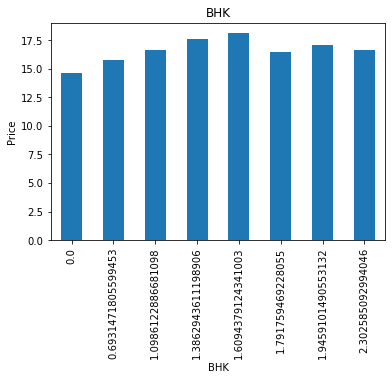

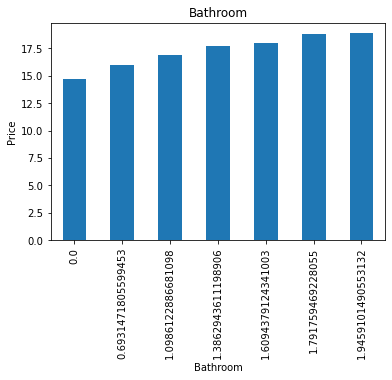

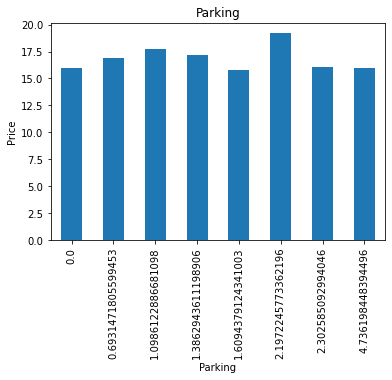

In [22]:
#To find the relationship between Discrete Variables and Price by plotting a bar

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

Continuous Variable

In [23]:
# to find the continuous features in the numerical features

continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature]
print("Continuous Variables Count: {}".format(len(continuous_feature)))

Continuous Variables Count: 3


In [24]:
continuous_feature

['Area', 'Per_Sqft', 'Price']

In [25]:
df[continuous_feature].head()

,Area,Per_Sqft,Price
0,6.856462,9.078065,16.341239
1,6.282267,8.894259,15.176487
2,7.154615,9.553363,16.523561
3,7.034388,10.008838,17.034386
4,7.034388,10.008838,17.034386


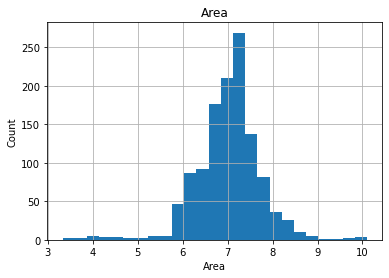

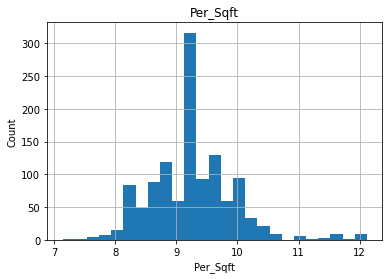

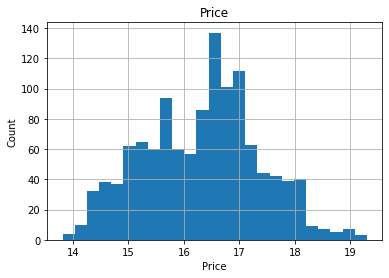

In [26]:
# To analyze the continuous variable by creating histograms

for feature in continuous_feature:
    
    # We make copy of the dataset,to make sure it does not make changes to the original dataset
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

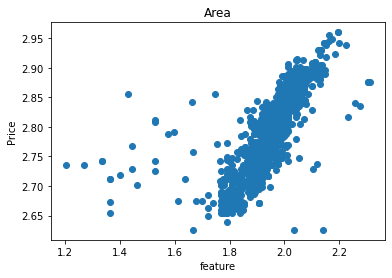

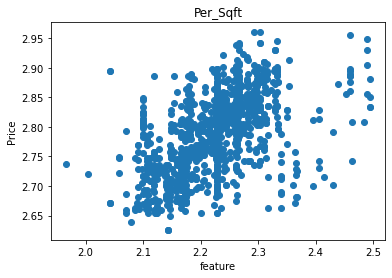

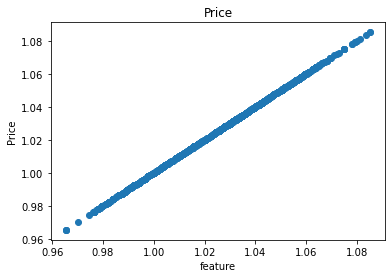

In [27]:
# Using logarithmic transformation

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel('feature')
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

Outliers

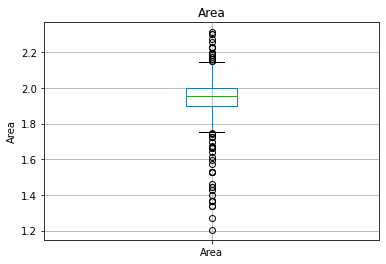

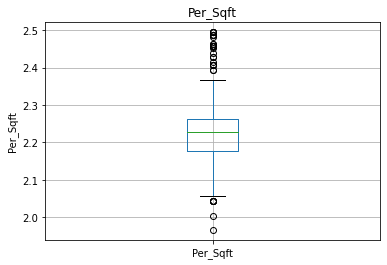

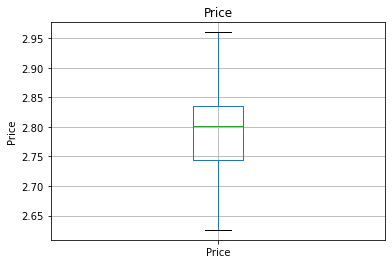

In [28]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Categorical Features

In [29]:
# To find the categorical Varibles

categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Furnishing',
 'Location',
 'District',
 'Locality',
 'Status',
 'Transaction',
 'Type']

In [30]:
df[categorical_features].head()

,Furnishing,Location,District,Locality,Status,Transaction,Type
0,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",Ready_to_move,Resale,Apartment
1,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",Ready_to_move,New_Property,Apartment
2,Furnished,Karol Bagh,Central Delhi,Karol Bagh,Ready_to_move,Resale,Builder_Floor
3,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",Almost_ready,Resale,Apartment
4,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",Almost_ready,Resale,Apartment


In [31]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))


The feature is Furnishing and number of categories are 3
The feature is Location and number of categories are 35
The feature is District and number of categories are 9
The feature is Locality and number of categories are 352
The feature is Status and number of categories are 2
The feature is Transaction and number of categories are 2
The feature is Type and number of categories are 3


In [32]:
# To capture all the nan values
# To handle the categorical data which are missing
feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in feature_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Type: 0.0041% missing values


In [33]:
## Replacing nan values with something else
def replace_cat_feature(df,feature_nan):
    data=df.copy()
    data[feature_nan]=data[feature_nan].fillna('missing')
    return data

df=replace_cat_feature(df,feature_nan)

df[feature_nan].isnull().sum()

Type    0
dtype: int64

In [34]:
df.head(50)

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price,BathroomNaN,ParkingNaN,Per_SqftNaN
0,6.856462,0.693147,0.693147,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",0.000000,Ready_to_move,Resale,Apartment,9.078065,16.341239,0,0,0
1,6.282267,0.693147,0.000000,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",0.000000,Ready_to_move,New_Property,Apartment,8.894259,15.176487,0,0,0
2,7.154615,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,Karol Bagh,0.693147,Ready_to_move,Resale,Builder_Floor,9.553363,16.523561,0,0,0
3,7.034388,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",0.693147,Almost_ready,Resale,Apartment,10.008838,17.034386,0,0,0
4,7.034388,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",0.693147,Almost_ready,Resale,Apartment,10.008838,17.034386,0,0,0
5,7.034388,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",0.693147,Almost_ready,Resale,Apartment,9.572620,17.034386,0,0,0
6,7.034388,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",0.693147,Almost_ready,Resale,Apartment,9.497322,17.014184,0,0,0
7,6.802395,1.098612,0.693147,Furnished,Okhla,East Delhi,"Abul Fazal Enclave Part-II, Okhla",0.000000,Ready_to_move,Resale,Builder_Floor,9.736074,15.520259,0,0,0
8,5.743003,1.386294,1.386294,Furnished,Laxmi Nagar,East Delhi,"Bank Enclave, Laxmi Nagar",0.000000,Ready_to_move,Resale,Apartment,11.627851,17.370859,0,0,0
9,7.313220,1.098612,1.098612,Furnished,Vasundhara,East Delhi,"Capital Apartment, Vasundhara Enclave",0.693147,Ready_to_move,Resale,Apartment,9.210340,16.523561,0,0,0


In [35]:
df.isnull().values.any()

False

handling rare categorical features

In [36]:
for feature in categorical_features:
    temp=df.groupby(feature)['Price'].count()/len(df)
    #print(temp)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
    

In [37]:
df.head(100)

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price,BathroomNaN,ParkingNaN,Per_SqftNaN
0,6.856462,0.693147,0.693147,Furnished,Karol Bagh,Central Delhi,Rare_var,0.000000,Ready_to_move,Resale,Apartment,9.078065,16.341239,0,0,0
1,6.282267,0.693147,0.000000,Furnished,Karol Bagh,Central Delhi,Rare_var,0.000000,Ready_to_move,New_Property,Apartment,8.894259,15.176487,0,0,0
2,7.154615,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,Rare_var,0.693147,Ready_to_move,Resale,Builder_Floor,9.553363,16.523561,0,0,0
3,7.034388,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",0.693147,Almost_ready,Resale,Apartment,10.008838,17.034386,0,0,0
4,7.034388,1.098612,1.098612,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",0.693147,Almost_ready,Resale,Apartment,10.008838,17.034386,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.907755,0.693147,0.693147,Furnished,Lajpat Nagar,South Delhi,Lajpat Nagar 3,0.000000,Ready_to_move,Resale,Apartment,9.903488,16.811243,0,0,0
96,6.907755,0.693147,0.693147,Furnished,Lajpat Nagar,South Delhi,Lajpat Nagar 3,0.000000,Ready_to_move,Resale,Apartment,9.903488,16.811243,0,0,0
97,7.438384,1.098612,1.098612,Furnished,Lajpat Nagar,South Delhi,Lajpat Nagar 3,0.693147,Ready_to_move,Resale,Builder_Floor,9.903488,16.759950,0,0,0
98,6.697034,1.098612,0.693147,Furnished,Mahavir Enclave,South Delhi,Rare_var,0.000000,Ready_to_move,Resale,Builder_Floor,10.650697,15.150512,0,0,0


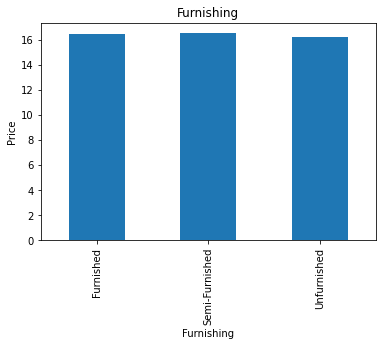

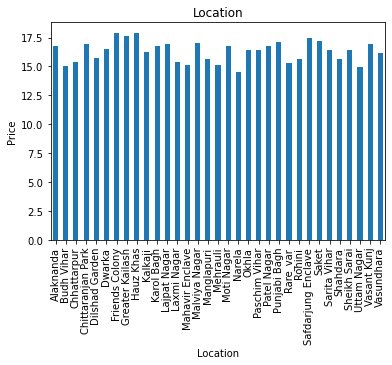

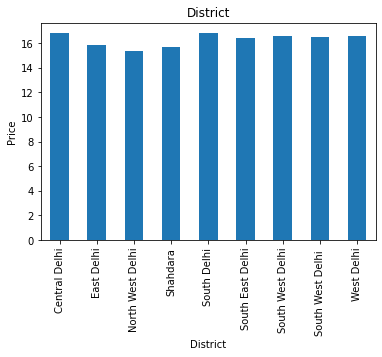

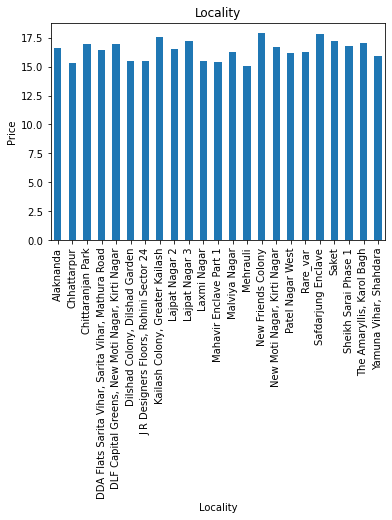

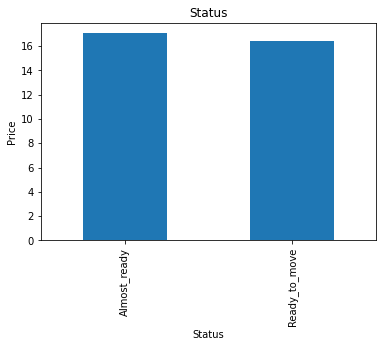

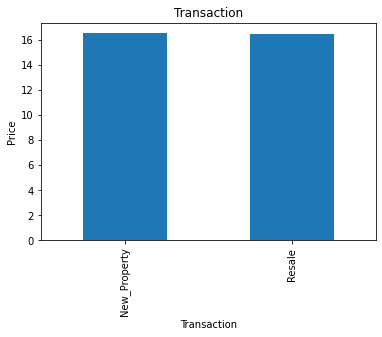

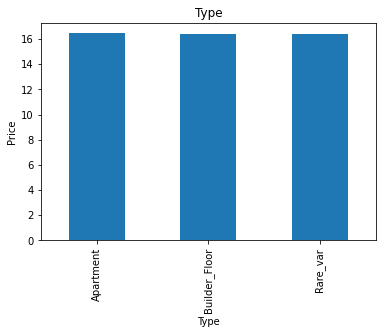

In [38]:
# To find the relationship between categorical variable and dependent feature

for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [39]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [40]:
df.head(100)

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price,BathroomNaN,ParkingNaN,Per_SqftNaN
0,6.856462,0.693147,0.693147,1,19,7,8,0.000000,0,0,1,9.078065,16.341239,0,0,0
1,6.282267,0.693147,0.000000,1,19,7,8,0.000000,0,1,1,8.894259,15.176487,0,0,0
2,7.154615,1.098612,1.098612,1,19,7,8,0.693147,0,0,2,9.553363,16.523561,0,0,0
3,7.034388,1.098612,1.098612,1,19,7,17,0.693147,1,0,1,10.008838,17.034386,0,0,0
4,7.034388,1.098612,1.098612,1,19,7,17,0.693147,1,0,1,10.008838,17.034386,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.907755,0.693147,0.693147,1,23,8,18,0.000000,0,0,1,9.903488,16.811243,0,0,0
96,6.907755,0.693147,0.693147,1,23,8,18,0.000000,0,0,1,9.903488,16.811243,0,0,0
97,7.438384,1.098612,1.098612,1,23,8,18,0.693147,0,0,2,9.903488,16.759950,0,0,0
98,6.697034,1.098612,0.693147,1,4,8,8,0.000000,0,0,2,10.650697,15.150512,0,0,0


In [41]:
df.isnull().values.any()

False

# Feature Scaling

In [42]:
feature_scale=[feature for feature in df.columns if feature not in ['Price'] and df[feature].dtypes!='O']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])


MinMaxScaler()

In [43]:
scaler.transform(df[feature_scale])

array([[0.52087546, 0.30103   , 0.35620719, ..., 0.        , 0.        ,
        0.        ],
       [0.436011  , 0.30103   , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5649417 , 0.47712125, 0.56457503, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65194317, 0.47712125, 0.56457503, ..., 0.        , 0.        ,
        0.        ],
       [0.47036586, 0.30103   , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44921596, 0.30103   , 0.35620719, ..., 0.        , 0.        ,
        0.        ]])

In [44]:
#transform the train and test set, and add on the Price variable

data =pd.concat([df[['Price']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[feature_scale]), columns= feature_scale)],axis=1)

In [45]:
data.head()

,Price,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,BathroomNaN,ParkingNaN,Per_SqftNaN
0,16.341239,0.520875,0.301030,0.356207,0.5,0.59375,0.875,0.363636,0.000000,0.0,0.0,0.5,0.389480,0.0,0.0,0.0
1,15.176487,0.436011,0.301030,0.000000,0.5,0.59375,0.875,0.363636,0.000000,0.0,1.0,0.5,0.352578,0.0,0.0,0.0
2,16.523561,0.564942,0.477121,0.564575,0.5,0.59375,0.875,0.363636,0.146351,0.0,0.0,1.0,0.484902,0.0,0.0,0.0
3,17.034386,0.547172,0.477121,0.564575,0.5,0.59375,0.875,0.772727,0.146351,1.0,0.0,0.5,0.576345,0.0,0.0,0.0
4,17.034386,0.547172,0.477121,0.564575,0.5,0.59375,0.875,0.772727,0.146351,1.0,0.0,0.5,0.576345,0.0,0.0,0.0


In [46]:

data.to_csv('x_train.csv',index=False)

# Model implementation

In [47]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns', None)

In [48]:
dataset=pd.read_csv('x_train.csv')

In [49]:
dataset.head()

,Price,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,BathroomNaN,ParkingNaN,Per_SqftNaN
0,16.341239,0.520875,0.301030,0.356207,0.5,0.59375,0.875,0.363636,0.000000,0.0,0.0,0.5,0.389480,0.0,0.0,0.0
1,15.176487,0.436011,0.301030,0.000000,0.5,0.59375,0.875,0.363636,0.000000,0.0,1.0,0.5,0.352578,0.0,0.0,0.0
2,16.523561,0.564942,0.477121,0.564575,0.5,0.59375,0.875,0.363636,0.146351,0.0,0.0,1.0,0.484902,0.0,0.0,0.0
3,17.034386,0.547172,0.477121,0.564575,0.5,0.59375,0.875,0.772727,0.146351,1.0,0.0,0.5,0.576345,0.0,0.0,0.0
4,17.034386,0.547172,0.477121,0.564575,0.5,0.59375,0.875,0.772727,0.146351,1.0,0.0,0.5,0.576345,0.0,0.0,0.0


In [50]:
## Capture the dependent feature
labels=dataset[['Price']]

In [51]:
## drop dependent feature from dataset
train=dataset.drop(['Price'],axis=1)

In [52]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(train, labels)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [53]:
feature_sel_model.get_support()

array([ True,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True])

In [54]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 15
selected features: 10
features with coefficients shrank to zero: 5


In [55]:
selected_feat

Index(['Area', 'BHK', 'Bathroom', 'Location', 'Locality', 'Status', 'Type',
       'Per_Sqft', 'ParkingNaN', 'Per_SqftNaN'],
      dtype='object')

In [56]:
X_train=train[selected_feat]

In [57]:
X_train.head()

,Area,BHK,Bathroom,Location,Locality,Status,Type,Per_Sqft,ParkingNaN,Per_SqftNaN
0,0.520875,0.301030,0.356207,0.59375,0.363636,0.0,0.5,0.389480,0.0,0.0
1,0.436011,0.301030,0.000000,0.59375,0.363636,0.0,0.5,0.352578,0.0,0.0
2,0.564942,0.477121,0.564575,0.59375,0.363636,0.0,1.0,0.484902,0.0,0.0
3,0.547172,0.477121,0.564575,0.59375,0.772727,1.0,0.5,0.576345,0.0,0.0
4,0.547172,0.477121,0.564575,0.59375,0.772727,1.0,0.5,0.576345,0.0,0.0


Applying Model Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train , x_test , y_train , y_test = train_test_split(X_train, labels , test_size = 0.20,random_state =2)

In [62]:
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
reg.score(x_test,y_test)

0.8498720884000808

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(971, 10)
(243, 10)
(971, 1)
(243, 1)


In [65]:
predictions = reg.predict(x_train)

Text(0.5, 1.0, 'LinearRegression Model')

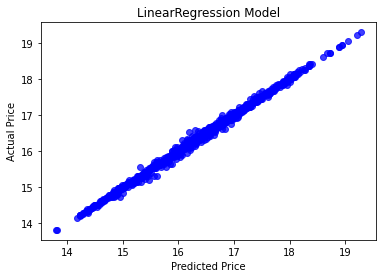

In [84]:
actual_values = y_train
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('LinearRegression Model')

In [120]:
fore = reg.predict(x_test)
print("Predicted purchases for new costumers:", fore)

Predicted purchases for new costumers: [[15.91970528]
 [15.09795431]
 [16.32498129]
 [18.39888063]
 [17.02128477]
 [17.56170606]
 [16.93309166]
 [13.9511631 ]
 [17.41073643]
 [14.42639976]
 [14.24088232]
 [17.86342295]
 [16.348502  ]
 [16.09301139]
 [14.13527988]
 [15.87570326]
 [15.4452599 ]
 [14.21736427]
 [16.06074912]
 [16.3915638 ]
 [17.49506413]
 [16.29224307]
 [16.35473485]
 [16.78447887]
 [16.47189338]
 [16.23545101]
 [14.24370738]
 [14.81106749]
 [14.58616295]
 [15.83439523]
 [16.49362667]
 [16.06364845]
 [15.62212646]
 [15.63905651]
 [16.52593684]
 [15.19832009]
 [17.35562972]
 [16.50862766]
 [17.69223972]
 [15.4620793 ]
 [16.70001229]
 [16.49820535]
 [17.45114041]
 [15.24187907]
 [16.77316546]
 [18.01356355]
 [14.62961315]
 [16.63350832]
 [16.94962042]
 [15.60886331]
 [15.8809825 ]
 [16.74310154]
 [16.00182448]
 [16.36954921]
 [18.24452193]
 [16.65469862]
 [14.62772774]
 [16.50608192]
 [15.4365763 ]
 [15.44197711]
 [16.22041972]
 [16.94091885]
 [15.64125478]
 [17.90006135]
 

In [121]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, fore))
print('MSE:', metrics.mean_squared_error(y_test, fore))

MAE: 0.3076763436714679
MSE: 0.17805645733024272


Applying Model Gradient Boosting Regressor

In [122]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [123]:
clf.fit(x_train, y_train)

C:\Users\disha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [124]:
clf.score(x_test,y_test)

0.8996605513392926

In [125]:
predictions = clf.predict(x_train)

Text(0.5, 1.0, 'GradientBoostingRegressor Model')

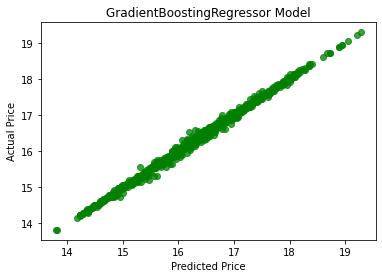

In [126]:
actual_values = y_train
plt.scatter(predictions, actual_values, alpha=.75,
            color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('GradientBoostingRegressor Model')

In [128]:
fore = clf.predict(x_test)
print("Predicted purchases for new costumers:", fore)

Predicted purchases for new costumers: [15.85375143 14.7403628  16.54160243 18.00836378 16.71068055 17.49287764
 16.94091482 14.75588134 17.60895187 14.80170742 14.77226862 17.88165399
 16.21462913 16.28763571 14.38549797 15.66918119 16.39893364 14.40487062
 15.7630453  16.42594759 17.73067804 16.73869577 16.54156321 16.40605472
 16.40205891 16.35308225 14.28563442 14.50734357 14.4887553  15.67118024
 17.03859861 16.21254825 15.68159816 15.75897615 17.23378634 14.65249141
 17.51525046 16.51926496 17.90868963 15.4563708  16.92923778 16.87803803
 17.66581541 14.85959181 17.14217377 18.56247333 14.72889441 16.39708616
 17.35958748 15.42855673 15.66125775 16.5688367  16.07317856 16.59324325
 18.72303618 16.96378894 14.99100924 16.74966274 15.10097722 15.37868704
 16.37221053 16.92400622 15.76055972 18.2373374  14.41338442 19.14563617
 17.45808194 16.47166899 14.99100924 14.40116416 16.73663357 14.93173915
 14.94258872 14.77656947 17.09844745 17.23014161 17.54349788 15.60307899
 17.3225215 

In [129]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, fore))
print('MSE:', metrics.mean_squared_error(y_test, fore))

MAE: 0.2357091004291613
MSE: 0.11900576360914981


Applying model Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators =100, random_state =0)

In [91]:
rfr.fit(x_train,y_train)

<ipython-input-91-3f392adc2e88>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestRegressor(random_state=0)

In [92]:
rfr.score(x_test,y_test)

0.9009667414763064

In [93]:
y_pred = rfr.predict(x_train) 

Text(0.5, 1.0, 'RandomForestRegressor Model')

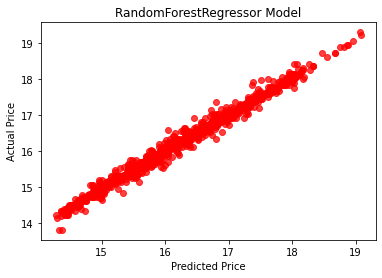

In [94]:
actual_values = y_train
plt.scatter(y_pred, actual_values, alpha=.75,
            color='r') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('RandomForestRegressor Model')

In [130]:
fore = rfr.predict(x_test)
print("Predicted purchases for new costumers:", fore)

Predicted purchases for new costumers: [15.68626169 14.83888882 16.57898002 17.93632377 16.71031837 17.79980656
 16.97108553 14.4375741  17.29680018 14.71925312 14.71655951 17.87615866
 16.28238125 16.23951073 14.47421613 15.75740463 16.13646992 14.60242603
 15.54720952 16.49473282 17.5707578  16.67239431 16.52540258 16.39488773
 16.5189575  16.40226863 14.4605178  14.56626292 14.55162514 15.54079158
 16.94513575 16.40777872 15.73738813 15.71194775 16.88851947 14.77841043
 17.25289235 16.54075556 17.77116959 15.43967179 16.93331567 16.40935308
 17.52188237 14.91232954 17.08945112 18.4355506  14.79275047 16.67505817
 17.38126156 15.41923395 15.86415911 16.56901032 16.24904546 16.59172061
 18.67799657 16.73714882 15.01614462 16.74013592 15.05971853 15.39504341
 16.41362271 16.99050037 15.76843274 17.87600946 14.50965787 19.04810864
 17.44496761 16.43470997 15.01614462 14.37725651 16.71068876 15.07237382
 14.78293687 14.86561859 16.8849928  17.29075927 17.6653138  15.34685712
 17.32440924

In [131]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, fore))
print('MSE:', metrics.mean_squared_error(y_test, fore))

MAE: 0.23700021339408822
MSE: 0.11745658074290057
